# Getting started with NLP with Categorical using Women's E-Commerce Clothing Reviews

# Outline

- Problem Statement
- Setup and Downloading Kaggle Dataset
- Imports + EDA
- Tokenization and Numericalization
- Evaluation

We are going to apply the techniques that we learn in Jeremy notebook https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners in a different dataset. If you have not checked out the above, I recommend reading the notebook first before readong further. 

# Problem Statement

The goal is to determine if a customer will recommend this product or not based on text fields such as review text & title, categorical fields such as Class, Department, Division and continuous fields such as Age, Rating, Posistive Feedback Count.

Let's treat this as a **Text Classification**.

As a baseline, we are going to only use the text based fields first as we wanted to explore nlp techniques. 

# Setup and Download dataset

In [1]:
#%pip install kaggle -qqq
#%pip install datasets -qqq
#%pip install transformers -Uqqq
#%pip install nbdev -Uqqq

In [2]:
import os

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

Make sure you have kaggle installed using `pip install kaggle`

We need an API key to use kaggle. So make sure you add the creds in the form `{"username":$USER,"key":$KEY}`

In [3]:
creds = ''

In [4]:
from pathlib import Path

In [5]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600) # change permissions to rw for the user.

Download the dataset https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews from kaggle.

In [6]:
owner = 'nicapotato'
path = Path('womens-ecommerce-clothing-reviews')

In [7]:
#!pip install kaggle

In [8]:
if not iskaggle and not path.exists():
    import zipfile, kaggle
    kaggle.api.dataset_download_cli(f'{owner}/{str(path)}')
    zipfile.ZipFile(f'{path.name}.zip').extractall(path.name)

# Import and EDA

In [9]:
from fastcore.all import *
import pandas as pd

In [10]:
if iskaggle: 
    path = Path('../input/womens-ecommerce-clothing-reviews')
    !pip install datasets
    !pip install transformers -Uqqq

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.9.3 requires transformers<4.19,>=4.1, but you have transformers 4.19.2 which is incompatible.


In [11]:
!ls {path}

'Womens Clothing E-Commerce Reviews.csv'


In [12]:
csv_file = path.ls()[0]

In [13]:
df = pd.read_csv(csv_file)

In [14]:
len(df)

23486

In [15]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [16]:
df.describe(include=['object', 'int'])

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,11742.500000,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,6779.968547,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5871.250000,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,11742.500000,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,17613.750000,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN


In [17]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [18]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [19]:
cat = ['Division Name', 'Department Name', 'Class Name']
cont = ['Age', 'Rating', 'Positive Feedback Count']

In [20]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

<AxesSubplot:>

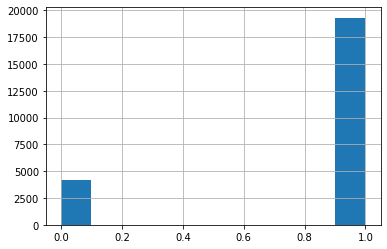

In [21]:
df['Recommended IND'].hist()

<AxesSubplot:>

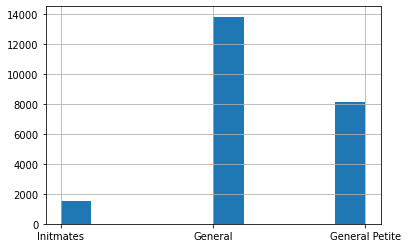

In [22]:
df['Division Name'].hist()

<AxesSubplot:>

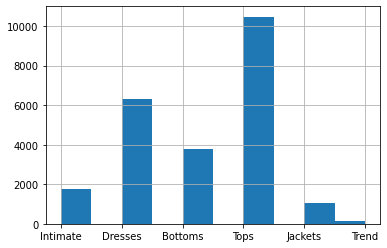

In [23]:
df['Department Name'].hist()

In [24]:
df['Class Name'].nunique(), df['Class Name'].value_counts()

(20,
 Dresses           6319
 Knits             4843
 Blouses           3097
 Sweaters          1428
 Pants             1388
 Jeans             1147
 Fine gauge        1100
 Skirts             945
 Jackets            704
 Lounge             691
 Swim               350
 Outerwear          328
 Shorts             317
 Sleep              228
 Legwear            165
 Intimates          154
 Layering           146
 Trend              119
 Casual bottoms       2
 Chemises             1
 Name: Class Name, dtype: int64)

## Missing Values

In [25]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Fill the missing values in 'Title' and 'Review Text' with empty spaces.

In [26]:
df['Title'].fillna('', inplace=True)
df['Review Text'].fillna('', inplace=True)

# Tokenization and Numericalization

We need to perform the two operations 
- Tokenization:  tranform the input to a individual symbols (tokens)
- Numericalization: convert the inidivudla tokens into numbers. 

In [27]:
df['input'] = 'TITLE: ' + df['Title'] + '; REVIEW: ' + df['Review Text']

Transformers uses `Dataset` object for storing the datasets.

In [28]:
from datasets import Dataset, DatasetDict

In [29]:
ds = Dataset.from_pandas(df)

In [30]:
ds

Dataset({
    features: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'input'],
    num_rows: 23486
})

In [31]:
cont

['Age', 'Rating', 'Positive Feedback Count']

In [32]:
rm_cols = ['Unnamed: 0', 'Clothing ID'] + cont

In [33]:
rm_cols

['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Positive Feedback Count']

Remove the columns that we do not need.

In [34]:
ds = ds.remove_columns(rm_cols)

Transformers library expect the target column to be predicted as 'label' column. So let's rename it.

In [35]:
ds = ds.rename_column('Recommended IND', 'labels')

In [36]:
ds

Dataset({
    features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input'],
    num_rows: 23486
})

When using pretrained model from transformers library, tokenization and model are tightly coupled ie we should do the same type of tokenization as the pretrained model.

Transformers provide a class `AutoTokenizer` which provides the right tokenizer based on the model name passed.

In [37]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained_model_nm = 'microsoft/deberta-v3-small'
tok = AutoTokenizer.from_pretrained(pretrained_model_nm)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/578 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.7/site-packages/transformers/convert_slow_tokenizer.py:435: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Define a simple function that tokenizes inputs

In [38]:
ds[0]['input']

'TITLE: ; REVIEW: Absolutely wonderful - silky and sexy and comfortable'

In [39]:
ds['input'][:3]

['TITLE: ; REVIEW: Absolutely wonderful - silky and sexy and comfortable',
 'TITLE: ; REVIEW: Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'TITLE: Some major design flaws; REVIEW: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c']

In [40]:
print(tok.tokenize(ds[0]['input']))

['▁TITLE', ':', '▁;', '▁REVIEW', ':', '▁Absolutely', '▁wonderful', '▁-', '▁silky', '▁and', '▁sexy', '▁and', '▁comfortable']


This has a special symbol that captures the space in a special token `▁` between words.

In [41]:
tok(ds[0]['input'])

{'input_ids': [1, 51928, 294, 2600, 46505, 294, 11403, 1496, 341, 20814, 263, 35747, 263, 1800, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

Tokenizer understands if the title is empty and also understands separator between title and review ';'

In [42]:
def tok_func(x): return tok(x['input'])

In [43]:
# - If batched is True and batch_size is ``n`` > 1, 
# then the function takes a batch of ``n`` examples as input 
# and can return a batch with ``n`` examples, or with an arbitrary number of examples.

tok_ds = ds.map(tok_func, batched=True)

  0%|          | 0/24 [00:00<?, ?ba/s]

In [44]:
tok_ds

Dataset({
    features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 23486
})

In [45]:
row = tok_ds[0]

In [46]:
row['input'], row['input_ids']

('TITLE: ; REVIEW: Absolutely wonderful - silky and sexy and comfortable',
 [1,
  51928,
  294,
  2600,
  46505,
  294,
  11403,
  1496,
  341,
  20814,
  263,
  35747,
  263,
  1800,
  2])

The ids are basically a mapping from a dictionary called vocab that's stored in the tokenizer

In [47]:
tok.vocab['▁Absolutely'], tok.vocab['▁wonderful'], tok.vocab['▁-']

(11403, 1496, 341)

# Test and Validation set

In [48]:
dds = tok_ds.train_test_split(test_size=0.1, seed=42)

In [49]:
dds

DatasetDict({
    train: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21137
    })
    test: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2349
    })
})

In [50]:
val_ds = dds['test']

In [51]:
val_ds

Dataset({
    features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2349
})

In [52]:
val_dds = val_ds.train_test_split(test_size=0.5, seed=42)

In [53]:
dds['eval'] = val_dds['train']

In [54]:
dds['test'] = val_dds['test']

In [55]:
dds

DatasetDict({
    train: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21137
    })
    test: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1175
    })
    eval: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1174
    })
})

# Metrics

In [56]:
from datasets import load_metric

Transformers expects a dict.

In [57]:
from datasets import Metric

In [58]:
metric = load_metric('accuracy')

In [59]:
metric.name, metric.features

('accuracy',
 {'predictions': Value(dtype='int32', id=None),
  'references': Value(dtype='int32', id=None)})

We need to call `metric.compute` to calculate the accuracy of predictions. Since all transformers models return logits, we need to convert the predictions to logits. 

In [60]:
import numpy as np

def compute_metrics(eval_preds): 
    logits, labels = eval_preds
    preds = np.argmax(logits, axis=-1)
    return metric.compute(predictions=preds, references=labels)

# Training

In [61]:
from transformers import TrainingArguments, Trainer

In [62]:
bs = 32
epochs = 4

lr = 8e-5 # this may require some testing either using lrfinder or with different values
fp16 = bool(iskaggle)

In [63]:
# enable fp16 when running on GPU
args = TrainingArguments(
    output_dir='outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=False, 
    evaluation_strategy='epoch', per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2, 
    num_train_epochs=epochs, weight_decay=0.1, report_to='none')

We need two things to create a sequence cls model 1) pretrained_model_name 2) num_labels
In our case, since this is a binary classification problem whether a customer recommend the product or not.

In [64]:
import numpy as np
set(dds['train']['labels'])

{0, 1}

In [65]:
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_nm, num_labels=2)

Downloading:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [66]:
# show_doc(Trainer)

In [67]:
trainer = Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['eval'], 
    tokenizer=tok, compute_metrics=compute_metrics)

Train the model

In [68]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: Class Name, Review Text, Department Name, Title, input, Division Name. If Class Name, Review Text, Department Name, Title, input, Division Name are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 21137
  Num Epochs = 4
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2644


Epoch,Training Loss,Validation Loss,Accuracy
1,0.273500,0.210992,0.915673
2,0.176100,0.165084,0.940375
3,0.133700,0.188848,0.942078
4,0.061500,0.232089,0.936116


Saving model checkpoint to outputs/checkpoint-500
Configuration saved in outputs/checkpoint-500/config.json
Model weights saved in outputs/checkpoint-500/pytorch_model.bin
tokenizer config file saved in outputs/checkpoint-500/tokenizer_config.json
Special tokens file saved in outputs/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: Class Name, Review Text, Department Name, Title, input, Division Name. If Class Name, Review Text, Department Name, Title, input, Division Name are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1174
  Batch size = 64
Saving model checkpoint to outputs/checkpoint-1000
Configuration saved in outputs/checkpoint-1000/config.json
Model weights saved in outputs/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in o

TrainOutput(global_step=2644, training_loss=0.1436786013183363, metrics={'train_runtime': 833.7286, 'train_samples_per_second': 101.41, 'train_steps_per_second': 3.171, 'total_flos': 3080870654072820.0, 'train_loss': 0.1436786013183363, 'epoch': 4.0})

We can see the accuracy score on the eval dataset.

# Predictions

Predictions on test data set

In [69]:
dds

DatasetDict({
    train: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21137
    })
    test: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1175
    })
    eval: Dataset({
        features: ['Title', 'Review Text', 'labels', 'Division Name', 'Department Name', 'Class Name', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1174
    })
})

In [70]:
preds = trainer.predict(dds['test']).predictions.astype(float)

The following columns in the test set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: Class Name, Review Text, Department Name, Title, input, Division Name. If Class Name, Review Text, Department Name, Title, input, Division Name are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1175
  Batch size = 64


In [71]:
preds

array([[-3.63973379,  3.63518858],
       [-3.63268614,  3.63469887],
       [-3.6397686 ,  3.69413948],
       ...,
       [-3.63655376,  3.63473058],
       [ 2.3602972 , -2.17315626],
       [-3.64113522,  3.67885995]])

In [72]:
eval_preds = [preds, dds['test']['labels']]
compute_metrics(eval_preds)

{'accuracy': 0.9285106382978724}

We got an accuracy of **0.92**

## fin